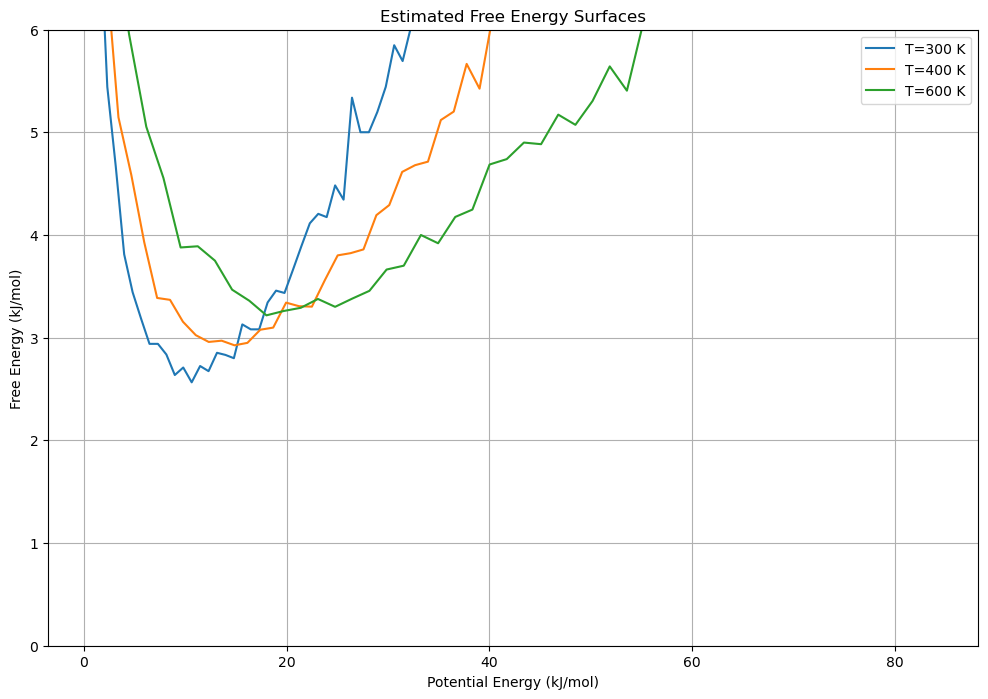

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数以加载势能数据，跳过注释行
def load_energy_data(file_path):
    data = np.loadtxt(file_path, comments=['@', '#'])
    return data[:, 1]  # 返回势能数据

# 定义函数来计算自由能
def estimate_free_energy(energy_data):
    hist, bin_edges = np.histogram(energy_data, bins=50, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    free_energy = -np.log(hist + 1e-10)  # 添加小常数避免对数零
    return bin_centers, free_energy

# 加载 T=300 的势能数据并估算自由能
energy_t300 = load_energy_data('T300/potential_energy.xvg')
bin_centers_t300, free_energy_t300 = estimate_free_energy(energy_t300)

# 加载 T=400 的势能数据并估算自由能
energy_t400 = load_energy_data('T400/potential_energy.xvg')
bin_centers_t400, free_energy_t400 = estimate_free_energy(energy_t400)

# 加载 T=600 的势能数据并估算自由能
energy_t600 = load_energy_data('T600/potential_energy.xvg')
bin_centers_t600, free_energy_t600 = estimate_free_energy(energy_t600)

# 绘制自由能面
plt.figure(figsize=(12, 8))
plt.plot(bin_centers_t300, free_energy_t300, label='T=300 K')
plt.plot(bin_centers_t400, free_energy_t400, label='T=400 K')
plt.plot(bin_centers_t600, free_energy_t600, label='T=600 K')

plt.title('Estimated Free Energy Surfaces')
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Free Energy (kJ/mol)')
plt.ylim(0, 6)  # 设置自由能的最大值为 6 kT
plt.legend()
plt.grid()
plt.savefig('estimated_free_energy_surfaces.png')  # 保存自由能面图
plt.show()

